## MSCA 32018 1 Natural Language Processing and Cognitive Computing

### Assignment 6

**Author: Targoon Siripanichpong**

You have been provided with a pickle file, containing 100 news articles about some company.  Use appropriate topic modeling technique to identify top N most important topics.

* read_pickle(directory+news_03.pkl')
* Present top N most important topics in these news articles
* Select N to identify relevant topics, but minimize duplication
* Explain how you selected N


Rules and requirements:

Your final output and the code should be contained within Jupyter Notebook (ipynb)

#### Import Data

In [1]:
import pickle

In [2]:
cat_news = pickle.load( open( "../Data/webhose_cat.pkl", "rb" ) )

In [3]:
type(cat_news)

pandas.core.frame.DataFrame

In [4]:
cat_news.head()

,crawled,language,text,title,url
0,2018-01-30T18:28:45.012+02:00,english,Avery Dennison's (AVY) Q4 results are likely t...,IRobot downgraded to neutral from buy at Sidot...,http://omgili.com/ri/.wHSUbtEfZQRfU.5KUm1RkeXy...
1,2018-01-30T18:29:07.001+02:00,french,"1m95, c’est trop grand. Et sa stature, Bertran...","""Bertrand Zibi Abeghe, encore prisonnier, et t...",http://omgili.com/ri/.wHSUbtEfZTpzFtnXyQJIwJ.j...
2,2018-01-30T18:29:40.000+02:00,english,Tuggers and Topper Industrial Carts Help Trans...,Tuggers and Topper Industrial Carts Help Trans...,http://omgili.com/ri/jHIAmI4hxg.zDiulpymXqU_n4...
3,2018-01-30T18:30:05.007+02:00,english,Currently adding the following games:\n100 (by...,,http://omgili.com/ri/.0rSU5LtMgyggHgoOVy9TMDWT...
4,2018-01-30T18:30:05.013+02:00,english,Quote: : » Currently adding the following game...,,http://omgili.com/ri/.0rSU5LtMgyggHgoOVy9TMDWT...


In [5]:
len(cat_news)

100

In [6]:
cat_news_en = cat_news[cat_news['language'] == 'english']

In [7]:
len(cat_news_en)

95

#### Data Pre-Processing

In [8]:
import re
import pandas as pd

In [9]:
import nltk
from nltk.text import Text
import sys
import multiprocessing
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
import inflection as inf

In [10]:
pool = multiprocessing.Pool(processes=7)
cat_news_en['text_tokenized'] = pool.map(nltk.tokenize.word_tokenize, cat_news_en['text'])

/home/targoon/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
cat_news_en.head()

,crawled,language,text,title,url,text_tokenized
0,2018-01-30T18:28:45.012+02:00,english,Avery Dennison's (AVY) Q4 results are likely t...,IRobot downgraded to neutral from buy at Sidot...,http://omgili.com/ri/.wHSUbtEfZQRfU.5KUm1RkeXy...,"[Avery, Dennison, 's, (, AVY, ), Q4, results, ..."
2,2018-01-30T18:29:40.000+02:00,english,Tuggers and Topper Industrial Carts Help Trans...,Tuggers and Topper Industrial Carts Help Trans...,http://omgili.com/ri/jHIAmI4hxg.zDiulpymXqU_n4...,"[Tuggers, and, Topper, Industrial, Carts, Help..."
3,2018-01-30T18:30:05.007+02:00,english,Currently adding the following games:\n100 (by...,,http://omgili.com/ri/.0rSU5LtMgyggHgoOVy9TMDWT...,"[Currently, adding, the, following, games, :, ..."
4,2018-01-30T18:30:05.013+02:00,english,Quote: : » Currently adding the following game...,,http://omgili.com/ri/.0rSU5LtMgyggHgoOVy9TMDWT...,"[Quote, :, :, », Currently, adding, the, follo..."
5,2018-01-30T18:30:05.014+02:00,english,Quote: : » Currently adding the following game...,,http://omgili.com/ri/.0rSU5LtMgyggHgoOVy9TMDWT...,"[Quote, :, :, », Currently, adding, the, follo..."


In [12]:
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def text_preprocessing(words):
    
    stopwords = set(nltk.corpus.stopwords.words('english'))
    wnl = WordNetLemmatizer()
    
    # Remove single-character tokens (mostly punctuation)
    words = [word for word in words if len(word) > 1]

    # Remove numbers
    words = [word for word in words if not word.isnumeric()]

    # Remove punctuation
    words = [word for word in words if word.isalpha()]

    # Lowercase all words (default_stopwords are lowercase too)
    words = [word.lower() for word in words]

    # Remove stopwords
    words = [word for word in words if word not in stopwords]
    
    # Get PoS Tagging
    words_pos = nltk.pos_tag(words)
    words_pos = [(word, get_wordnet_pos(pos)) for (word, pos) in words_pos]
    
    # Lemmatize with POS tagging
    words_pos = [(wnl.lemmatize(word, pos), pos) for (word, pos) in words_pos]
    
    # Singularize words
    words = [inf.singularize(word) if pos == 'n' else word for (word, pos) in words_pos]
    
    return(words)

In [13]:
pool = multiprocessing.Pool(processes=7)
cat_news_en['text_tokenized_cleaned'] = pool.map(text_preprocessing, cat_news_en['text_tokenized'])

/home/targoon/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Topic Modeling

In [14]:
import gensim
import pprint
from gensim import corpora, models
from gensim.models.ldamulticore import LdaMulticore
from gensim.models import CoherenceModel
import pyLDAvis.gensim

In [15]:
dictionary = corpora.Dictionary(cat_news_en['text_tokenized_cleaned'])
dictionary.filter_extremes(no_below=5, no_above=0.5)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in cat_news_en['text_tokenized_cleaned']]

**Create Topic Models from 2 to 20 topics**

In [16]:
coherence_score = []
lda_model_list = []
for i in range(2,21,2):
    lda_model = LdaMulticore(doc_term_matrix, num_topics=i, id2word = dictionary, passes=200, random_state=42)
    print(*lda_model.print_topics(num_words=6), sep='\n')
    lda_model_list.append(lda_model)
    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=cat_news_en['text_tokenized_cleaned'], dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_score.append(coherence_lda)
    print('\nCoherence Score: ', coherence_lda)
    print('=========================================')

(0, '0.017*"market" + 0.015*"company" + 0.009*"share" + 0.008*"city" + 0.008*"state" + 0.007*"product"')
(1, '0.023*"plant" + 0.013*"case" + 0.008*"one" + 0.007*"wardian" + 0.006*"blade" + 0.006*"water"')

Coherence Score:  0.30960767499324904
(0, '0.014*"city" + 0.013*"u" + 0.011*"one" + 0.011*"estimate" + 0.011*"state" + 0.010*"company"')
(1, '0.037*"plant" + 0.021*"case" + 0.011*"wardian" + 0.011*"water" + 0.009*"one" + 0.009*"terrarium"')
(2, '0.052*"market" + 0.017*"amazon" + 0.016*"seattle" + 0.015*"report" + 0.015*"industry" + 0.011*"growth"')
(3, '0.021*"company" + 0.020*"share" + 0.016*"product" + 0.011*"industrial" + 0.010*"operation" + 0.010*"stock"')

Coherence Score:  0.31515800453231196
(0, '0.017*"u" + 0.015*"say" + 0.014*"china" + 0.013*"company" + 0.012*"one" + 0.012*"would"')
(1, '0.043*"plant" + 0.024*"case" + 0.013*"wardian" + 0.013*"water" + 0.011*"one" + 0.011*"terrarium"')
(2, '0.082*"market" + 0.025*"industry" + 0.024*"report" + 0.019*"analysis" + 0.017*"growth"

(0, '0.059*"ga" + 0.037*"natural" + 0.031*"china" + 0.026*"international" + 0.021*"oil" + 0.019*"organic"')
(1, '0.030*"post" + 0.029*"canna" + 0.023*"duggan" + 0.023*"grapple" + 0.021*"complete" + 0.019*"van"')
(2, '0.040*"robot" + 0.032*"grader" + 0.023*"market" + 0.017*"global" + 0.016*"system" + 0.014*"one"')
(3, '0.037*"share" + 0.035*"company" + 0.029*"industrial" + 0.027*"stock" + 0.024*"product" + 0.019*"rating"')
(4, '0.036*"amazon" + 0.030*"seattle" + 0.021*"company" + 0.018*"employee" + 0.017*"monday" + 0.017*"grand"')
(5, '0.022*"two" + 0.022*"life" + 0.022*"video" + 0.019*"lift" + 0.018*"light" + 0.017*"hour"')
(6, '0.025*"market" + 0.020*"support" + 0.019*"vehicle" + 0.017*"engine" + 0.012*"power" + 0.011*"well"')
(7, '0.076*"market" + 0.024*"industry" + 0.023*"analysis" + 0.019*"product" + 0.017*"report" + 0.016*"growth"')
(8, '0.045*"city" + 0.032*"estimate" + 0.029*"state" + 0.022*"home" + 0.017*"major" + 0.016*"live"')
(9, '0.082*"operation" + 0.081*"share" + 0.079*"j

**Calculate coherence score**

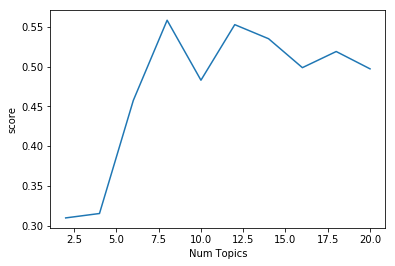

In [19]:
import matplotlib.pyplot as plt
x = range(2,21,2)
plt.plot(x, coherence_score)
plt.xlabel("Num Topics")
plt.ylabel("score")
plt.show()

Based on the coherence score, the score plateaus starting around the number of topic ~8. After the number of topic starts to increase more than 8, the score starts to fluctuate and plateau. It can also be observed that as the number of topic increases, duplicate topics start to present. For instance, when n=14, two of the topics are:

*(6, '0.054*"market" + 0.019*"industry" + 0.016*"vehicle" + 0.015*"report" + 0.015*"global" + 0.014*"growth"')*

*(7, '0.059*"market" + 0.018*"industry" + 0.017*"product" + 0.016*"report" + 0.015*"state" + 0.014*"analysis"')*

Therefore, given n=8 yields the highest coherence score, this would be selected as an optimal number of topics. To validate that there is no duplications, the graph is plotted below.



In [18]:
lda_display = pyLDAvis.gensim.prepare(lda_model_list[3], doc_term_matrix, dictionary, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display)

/home/targoon/.local/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


It can be seen that the topic clusters are quite evenly distributed across the map. The cluster size are quite even as well. The closest topics (1 and 3), which could potentially be combined if the number of clusters reduce, do represent different topics. Topic 1 represents international investment between US and China, and topic 3 represents more domestic-related contents. This provides more confidence that n=8 would be an optimal choice for topic modeling.